In [1]:
import torch
import math
import matplotlib.pyplot as plt

In [2]:
class CentralDotImage :
    """
        creates mock data set out of a simple image copied multiple times

        Attributes
        ----------
        height : int
            of image, in pixels
        width : int
            of image, in pixels
        size : int
            number of pixels in image
        dataset_size : int
            number of images
        
        image : torch.Tensor
            out of 1s and 0s,
            size = (width, height)
        vector : torch.Tensor
            flattened image,
            size = (size)
        data : torch.Tensor
            images copied dataset_size times
            size = (dataset_size, size)
        dataset : torch.TensorDataset


        Methods
        -------
        __init__() : creates all attributes
        show() : plt.plots image
    """

    def __init__ (self, height, width, dataset_size = 100) :
        # Input checks
        assert  type(height) == int and type(width) == int
        assert  height >= 1 and width >= 1
        assert  type(dataset_size) == int
        assert  dataset_size >= 1

        self.height = height
        self.width  = width
        self.size   = height * width
        self.dataset_size = dataset_size

        # Image creation
        self.image = torch.zeros(height, width)
        for i in range(height) :
            for j in range(width) :
                self.image[i, j] = \
                    i + 1 <= math.ceil(3/4 * height) and \
                    i + 1 > math.floor(1/4 * height) and \
                    j + 1 <= math.ceil(3/4 * width) and \
                    j + 1 > math.floor(1/4 * width)

        # Dataset creation
        self.vector  = self.image.flatten()
        self.data    = self.vector[None, :].expand(dataset_size, self.size)
        self.dataset = torch.utils.data.TensorDataset(self.data)

    def show (self) :
        plt.imshow(self.image)
        plt.show()

In [51]:
mock = CentralDotImage(72, 96)
minimock = CentralDotImage(4, 4)

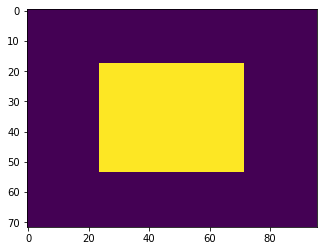

In [52]:
mock.show()

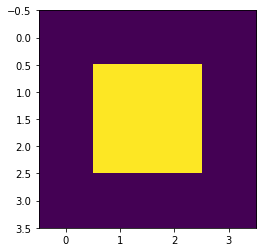

In [53]:
minimock.show()